In [ ]:
import json
import pandas as pd
import numpy as np

with open('/content/project_training.json', 'r', encoding='latin1') as fd:
  df = pd.read_json(fd)
  df["climate"] = df["climate"].replace({"yes": 0, "no": 1})
  df["sentiment"] = df["sentiment"].replace({"opportunity": 0, "neutral": 1, "risk": 2})
  df["specificity"] = df["specificity"].replace({"spec": 0, "non": 1})
  df["commitment"] = df["commitment"].replace({"yes": 0, "no": 1})
  print(df)

                                                  text  climate  sentiment  \
0    The accelerator programs have sub-portfolios o...        0        1.0   
1    Also by means of BNDES Finem, we offer credit ...        1        NaN   
2    Climate change Climate change exposes UPM to v...        0        2.0   
3    Several tools and methodologies aimed at asses...        0        2.0   
4    We worked with the UK government to accelerate...        0        0.0   
..                                                 ...      ...        ...   
395  At the beginning of 2019, VINCI Airports signe...        1        NaN   
396  We have also signed up to the Partnership for ...        0        2.0   
397  Suzano also is involved and spearheads externa...        0        1.0   
398  Risks to the Group’s reputation Risks include ...        1        NaN   
399  UBS is also involved in other activities to re...        0        1.0   

     commitment  specificity  
0           1.0          1.0  
1

In [ ]:
#read test data
with open('/content/project_validation.json', 'r', encoding='latin1') as fd1:
  df_test = pd.read_json(fd1)

df_test["climate"] = df_test["climate"].replace({"yes": 0, "no": 1})
df_test["sentiment"] = df_test["sentiment"].replace({"opportunity": 0, "neutral": 1, "risk": 2})
df_test["specificity"] = df_test["specificity"].replace({"spec": 0, "non": 1})
df_test["commitment"] = df_test["commitment"].replace({"yes": 0, "no": 1})
print(df)

                                                  text  climate  sentiment  \
0    The accelerator programs have sub-portfolios o...        0        1.0   
1    Also by means of BNDES Finem, we offer credit ...        1        NaN   
2    Climate change Climate change exposes UPM to v...        0        2.0   
3    Several tools and methodologies aimed at asses...        0        2.0   
4    We worked with the UK government to accelerate...        0        0.0   
..                                                 ...      ...        ...   
395  At the beginning of 2019, VINCI Airports signe...        1        NaN   
396  We have also signed up to the Partnership for ...        0        2.0   
397  Suzano also is involved and spearheads externa...        0        1.0   
398  Risks to the Group’s reputation Risks include ...        1        NaN   
399  UBS is also involved in other activities to re...        0        1.0   

     commitment  specificity  
0           1.0          1.0  
1

In [ ]:
import sklearn
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from nltk.stem import PorterStemmer
from nltk import word_tokenize

from scipy.sparse import csr_matrix

from nltk.corpus import stopwords
nltk.download('stopwords')
import seaborn as sns

nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('punkt')

#preprocessing text

stopwords = stopwords.words("english")

def prep(t):
  l = t.split()
  #stem
  stemmer = PorterStemmer()
  l = [stemmer.stem(w) for w in l]
  l = [w for w in l if w not in stopwords]
  l = [w for w in l if w.isalpha()]
  return ' '.join(l)
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


X_train:   (0, 11)	1
  (0, 1655)	1
  (0, 873)	1
  (0, 729)	1
  (0, 2065)	1
  (0, 958)	1
  (0, 1083)	1
  (0, 668)	1
  (0, 965)	1
  (0, 372)	2
  (0, 342)	2
  (0, 641)	1
  (0, 1828)	1
  (0, 1166)	1
  (0, 732)	1
  (1, 2065)	1
  (1, 95)	1
  (1, 1300)	1
  (1, 243)	1
  (1, 1438)	1
  (1, 501)	2
  (1, 1669)	1
  (1, 1230)	1
  (1, 71)	1
  (1, 1788)	1
  :	:
  (399, 71)	1
  (399, 1832)	1
  (399, 1773)	1
  (399, 847)	1
  (399, 1458)	1
  (399, 606)	1
  (399, 409)	1
  (399, 733)	1
  (399, 846)	1
  (399, 1751)	1
  (399, 1075)	1
  (399, 301)	1
  (399, 1387)	2
  (399, 1276)	1
  (399, 28)	1
  (399, 1142)	1
  (399, 43)	1
  (399, 2319)	1
  (399, 48)	1
  (399, 1140)	1
  (399, 1310)	1
  (399, 1507)	1
  (399, 2201)	1
  (399, 1704)	1
  (399, 924)	1
y_train: 0      0
1      1
2      0
3      0
4      0
      ..
395    1
396    0
397    0
398    1
399    0
Name: climate, Length: 400, dtype: int64
X_test:   (0, 116)	1
  (0, 199)	1
  (0, 632)	1
  (0, 773)	1
  (0, 1267)	1
  (0, 1298)	1
  (0, 1798)	1
  (0, 2143)	1
  

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['ab', 'abc', 'abil', 'abl', 'abnorm', 'abov', 'abp', 'abr', 'abreast', 'absente', 'absolut', 'acceler', 'accept', 'access', 'accommod', 'accomplish', 'accord', 'accordingli', 'account', 'accur', 'accuraci', 'achiev', 'acknowledg', 'acquir', 'acquisit', 'across', 'act', 'action', 'activ', 'actor', 'actual', 'acut', 'ad', 'adapt', 'add', 'addit', 'address', 'adequ', 'adequaci', 'adher', 'adjust', 'administr', 'adopt', 'advanc', 'advantag', 'advers', 'advisian', 'advisor', 'advisori', 'advoc', 'aegi', 'aegon', 'affair', 'affect', 'afford', 'africa', 'african', 'age', 'agenc', 'agenda', 'aggreg', 'agil', 'agl', 'agre', 'agreement', 'agribusi', 'agricultur', 'ahead', 'aia', 'aid', 'aieti', 'aim', 'air', 'aircraft', 'airfram', 'airlin', 'airport', 'airway', 'aladdin', 'alaristm', 'alarm', 'alcohol', 'alec', 'alibaba', 'align', 'allegedli', 'alli', 'allianc', 'alloc', 'allow', 'almost', 'alon', 'along', 'alongsid', 'alreadi', 'also', 'alter', 'altern', 'although', 'alway', 'amber', 'ambit', 

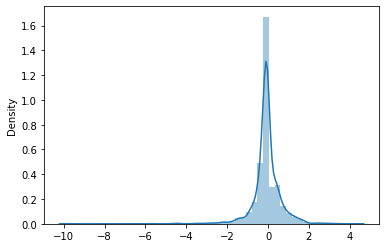

In [ ]:
#logistic regression
m = LogisticRegression(penalty = 'none', class_weight = 'balanced')

vectorizer = CountVectorizer(preprocessor=prep)
X_train = vectorizer.fit_transform(df['text'])
y_train = df['climate']
m.fit(X_train.toarray(), y_train)
sns.distplot(m.coef_)

df.head()

#predict model
X_test = vectorizer.transform(df_test["text"])
#X_test_subset = csr_matrix(X_test[:, :4000])
y_test = df_test['climate']
print("X_train:", X_train)
print("y_train:", y_train)
print("X_test:", X_test)
print("y_test:", y_test)
print(X_test.shape)

pred_class = m.predict(X_test)
print("pred_class")
print(pred_class)
print(classification_report(y_test, pred_class))

#classification report
clr = pd.DataFrame(classification_report(y_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    clr.to_excel(writer, sheet_name="clr")

print(vectorizer.get_feature_names())
print(X_train.shape)
print(X_train.toarray())
print(type(df['text']))

word_to_coef = dict(zip(vectorizer.get_feature_names(), m.coef_.squeeze()))
print(dict(sorted(word_to_coef.items(), key=lambda item: item[1])))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

           0       0.94      0.87      0.90       329
           1       0.55      0.73      0.63        71

    accuracy                           0.85       400
   macro avg       0.75      0.80      0.77       400
weighted avg       0.87      0.85      0.86       400



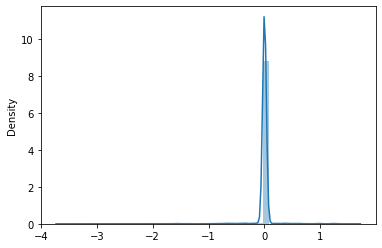

In [ ]:
#Lasso
m1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', class_weight = 'balanced')
m1.fit(X_train, y_train)
sns.distplot(m1.coef_)

#predict model
pred_class = m1.predict(X_test)
print(classification_report(y_test, pred_class))

#classification report
classo = pd.DataFrame(classification_report(y_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    classo.to_excel(writer, sheet_name="classo")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

           0       0.91      0.93      0.92       329
           1       0.62      0.56      0.59        71

    accuracy                           0.86       400
   macro avg       0.77      0.75      0.75       400
weighted avg       0.86      0.86      0.86       400



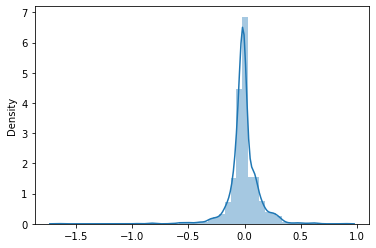

In [ ]:
#Ridge
m2 = LogisticRegression(penalty='l2', C=1.0, class_weight = 'balanced')
m2.fit(X_train, y_train)
sns.distplot(m2.coef_)

#predict model
pred_class = m2.predict(X_test)
print(classification_report(y_test, pred_class))

#classification report
cri = pd.DataFrame(classification_report(y_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    cri.to_excel(writer, sheet_name="cri")

In [ ]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC(kernel='rbf', C=1.0, class_weight = 'balanced')
model.fit(X_train, y_train)

#predict model
pred_class = model.predict(X_test)
print(classification_report(y_test, pred_class))

#classification report
csvm = pd.DataFrame(classification_report(y_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    csvm.to_excel(writer, sheet_name="csvm")

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       329
           1       0.59      0.41      0.48        71

    accuracy                           0.84       400
   macro avg       0.74      0.67      0.70       400
weighted avg       0.83      0.84      0.83       400



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(400, 2362)
(400, 2362)
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       329
           1       0.71      0.38      0.50        71

    accuracy                           0.86       400
   macro avg       0.79      0.67      0.71       400
weighted avg       0.85      0.86      0.84       400



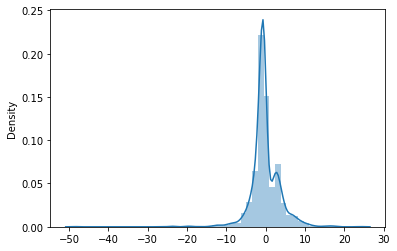

In [ ]:
#TF-IDF
tf = TfidfVectorizer(preprocessor=prep)
tfX_train = tf.fit_transform(df["text"])
y_train = df['climate']
m.fit(tfX_train, y_train)
sns.distplot(m.coef_)
print(tfX_train.shape)

tfX_test = tf.transform(df_test["text"])
y_test = df_test['climate']
print(tfX_test.shape)

pred_class = m.predict(tfX_test)
print(classification_report(y_test, pred_class))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

           0       0.88      0.97      0.92       329
           1       0.71      0.38      0.50        71

    accuracy                           0.86       400
   macro avg       0.79      0.67      0.71       400
weighted avg       0.85      0.86      0.84       400



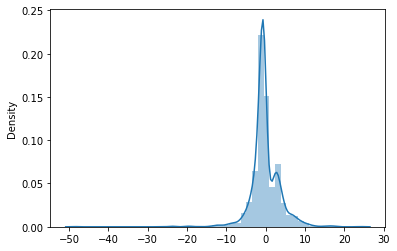

In [ ]:
#logistic regression
m.fit(tfX_train, y_train)

#predict model
pred_class = m.predict(tfX_test)
sns.distplot(m.coef_)
print(classification_report(y_test, pred_class))

#classification report
ctflr = pd.DataFrame(classification_report(y_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    ctflr.to_excel(writer, sheet_name="ctflr")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

           0       1.00      0.72      0.84       329
           1       0.43      0.99      0.60        71

    accuracy                           0.77       400
   macro avg       0.71      0.85      0.72       400
weighted avg       0.90      0.77      0.79       400



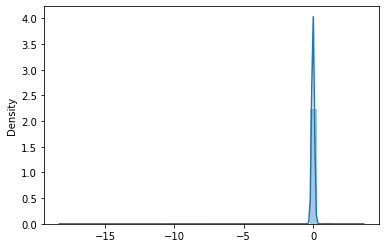

In [ ]:
#Lasso
m1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', class_weight = 'balanced')
m1.fit(tfX_train, y_train)
sns.distplot(m1.coef_)

#predict model
pred_class = m1.predict(tfX_test)
print(classification_report(y_test, pred_class))

#classification report
ctfla = pd.DataFrame(classification_report(y_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    ctfla.to_excel(writer, sheet_name="ctfla")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

           0       0.89      0.94      0.91       329
           1       0.62      0.46      0.53        71

    accuracy                           0.85       400
   macro avg       0.76      0.70      0.72       400
weighted avg       0.84      0.85      0.85       400



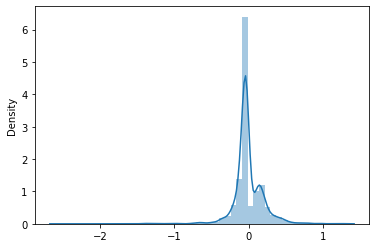

In [ ]:
#Ridge
#m2 = LogisticRegression(penalty='l2', C=1.0)
m2.fit(tfX_train, y_train)
sns.distplot(m2.coef_)

#predict model
pred_class = m2.predict(tfX_test)
print(classification_report(y_test, pred_class))

#classification report
ctfri = pd.DataFrame(classification_report(y_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    ctfri.to_excel(writer, sheet_name="ctfri")

In [ ]:
#SVM

model = SVC(kernel='rbf', C=1.0, class_weight = 'balanced')
model.fit(tfX_train, y_train)

#predict model
pred_class = model.predict(tfX_test)
print(classification_report(y_test, pred_class))

#classification report
ctfsvm = pd.DataFrame(classification_report(y_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    ctfsvm.to_excel(writer, sheet_name="ctfsvm")

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       329
           1       0.83      0.14      0.24        71

    accuracy                           0.84       400
   macro avg       0.84      0.57      0.58       400
weighted avg       0.84      0.84      0.79       400



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.66      0.79      0.72        81
         1.0       0.73      0.72      0.72       136
         2.0       0.86      0.74      0.79       112

    accuracy                           0.74       329
   macro avg       0.75      0.75      0.75       329
weighted avg       0.75      0.74      0.75       329



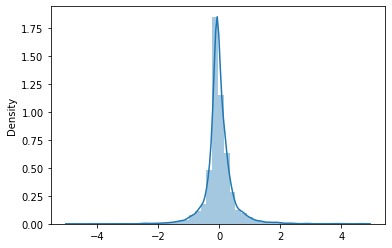

In [ ]:
#sentiment
st = df[df['climate'] == 0]['text']
sv = df_test[df_test['climate'] == 0]['text']
sty = df[df['climate'] == 0]['sentiment']
svy = df_test[df_test['climate'] == 0]['sentiment']
sX_train = vectorizer.fit_transform(st)
sy_train = sty

#Logistic Regression
m.fit(sX_train.toarray(), sy_train)
sns.distplot(m.coef_)

#predict model
sX_test = vectorizer.transform(sv)
#X_test_subset = csr_matrix(X_test[:, :4000])
sy_test = svy
pred_class = m.predict(sX_test)
print(classification_report(sy_test, pred_class))

#classification report
slr = pd.DataFrame(classification_report(sy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    slr.to_excel(writer, sheet_name="slr")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.72      0.73      0.72        81
         1.0       0.70      0.79      0.74       136
         2.0       0.85      0.72      0.78       112

    accuracy                           0.75       329
   macro avg       0.76      0.75      0.75       329
weighted avg       0.76      0.75      0.75       329



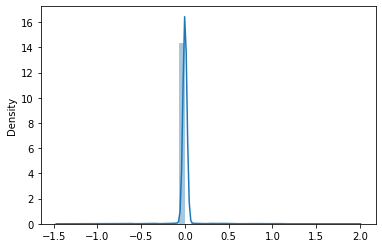

In [ ]:
#Lasso
m1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', class_weight = 'balanced')
m1.fit(sX_train, sy_train)
sns.distplot(m1.coef_)

#predict model
pred_class = m1.predict(sX_test)
print(classification_report(sy_test, pred_class))

#classification report
sla = pd.DataFrame(classification_report(sy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    sla.to_excel(writer, sheet_name="sla")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.67      0.80      0.73        81
         1.0       0.75      0.76      0.76       136
         2.0       0.91      0.77      0.83       112

    accuracy                           0.78       329
   macro avg       0.78      0.78      0.77       329
weighted avg       0.79      0.78      0.78       329



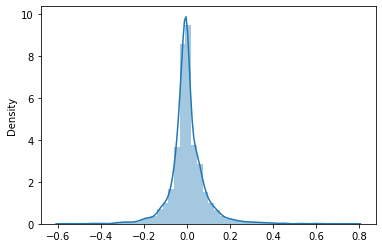

In [ ]:
#Ridge
m2 = LogisticRegression(penalty='l2', C=1.0, class_weight = 'balanced')
m2.fit(sX_train, sy_train)
sns.distplot(m2.coef_)

#predict model
pred_class = m2.predict(sX_test)
print(classification_report(sy_test, pred_class))

#classification report
sri = pd.DataFrame(classification_report(sy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    sri.to_excel(writer, sheet_name="sri")

In [ ]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC(kernel='rbf', C=1.0, class_weight = 'balanced')
model.fit(sX_train, sy_train)

#predict model
pred_class = model.predict(sX_test)
print(classification_report(sy_test, pred_class))

#classification report
ssvm = pd.DataFrame(classification_report(sy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    ssvm.to_excel(writer, sheet_name="ssvm")

              precision    recall  f1-score   support

         0.0       0.69      0.73      0.71        81
         1.0       0.69      0.83      0.75       136
         2.0       0.93      0.66      0.77       112

    accuracy                           0.75       329
   macro avg       0.77      0.74      0.75       329
weighted avg       0.77      0.75      0.75       329



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(329, 2136)
              precision    recall  f1-score   support

         0.0       0.68      0.83      0.75        81
         1.0       0.75      0.72      0.74       136
         2.0       0.87      0.79      0.83       112

    accuracy                           0.77       329
   macro avg       0.77      0.78      0.77       329
weighted avg       0.78      0.77      0.77       329



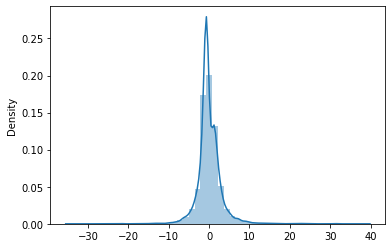

In [ ]:
#TF-IDF
tf = TfidfVectorizer(preprocessor=prep)
s_tfX_train = tf.fit_transform(st)
sy_train = sty
m.fit(s_tfX_train, sy_train)
sns.distplot(m.coef_)

s_tfX_test = tf.transform(sv)
sy_test = svy
print(s_tfX_test.shape)

pred_class = m.predict(s_tfX_test)
print(classification_report(sy_test, pred_class))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.68      0.83      0.75        81
         1.0       0.75      0.72      0.74       136
         2.0       0.87      0.79      0.83       112

    accuracy                           0.77       329
   macro avg       0.77      0.78      0.77       329
weighted avg       0.78      0.77      0.77       329



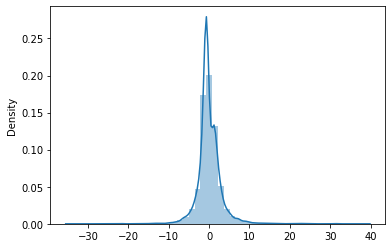

In [ ]:
#logistic regression
m = LogisticRegression(penalty = 'none', class_weight = 'balanced')
m.fit(s_tfX_train, sy_train)

#predict model
pred_class = m.predict(s_tfX_test)
sns.distplot(m.coef_)
print(classification_report(sy_test, pred_class))

#classification report
stflr = pd.DataFrame(classification_report(sy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    stflr.to_excel(writer, sheet_name="stflr")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.67      0.63      0.65        81
         1.0       0.68      0.79      0.73       136
         2.0       0.83      0.69      0.75       112

    accuracy                           0.72       329
   macro avg       0.72      0.70      0.71       329
weighted avg       0.73      0.72      0.72       329



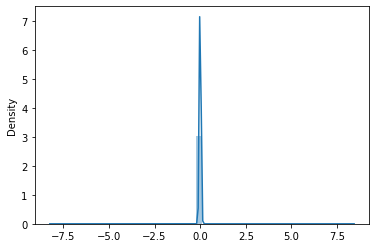

In [ ]:
#Lasso
m1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', class_weight = 'balanced')
m1.fit(s_tfX_train, sy_train)
sns.distplot(m1.coef_)

#predict model
pred_class = m1.predict(s_tfX_test)
print(classification_report(sy_test, pred_class))

#classification report
stfla = pd.DataFrame(classification_report(sy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    stfla.to_excel(writer, sheet_name="stfla")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.68      0.85      0.75        81
         1.0       0.76      0.77      0.77       136
         2.0       0.92      0.73      0.82       112

    accuracy                           0.78       329
   macro avg       0.79      0.79      0.78       329
weighted avg       0.79      0.78      0.78       329



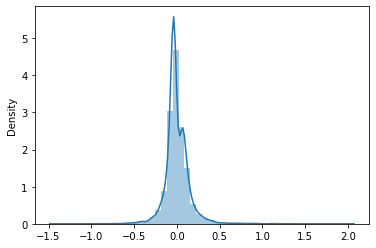

In [ ]:
#Ridge
m2 = LogisticRegression(penalty='l2', C=1.0, class_weight = 'balanced')
m2.fit(s_tfX_train, sy_train)
sns.distplot(m2.coef_)

#predict model
pred_class = m2.predict(s_tfX_test)
print(classification_report(sy_test, pred_class))

#classification report
stfri = pd.DataFrame(classification_report(sy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    stfri.to_excel(writer, sheet_name="stfri")

In [ ]:
#SVM

model = SVC(kernel='rbf', C=1.0, class_weight = 'balanced')
model.fit(s_tfX_train, sy_train)

#predict model
pred_class = model.predict(s_tfX_test)
print(classification_report(sy_test, pred_class))

#classification report
stfsvm = pd.DataFrame(classification_report(sy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    stfsvm.to_excel(writer, sheet_name="stfsvm")

              precision    recall  f1-score   support

         0.0       0.74      0.77      0.75        81
         1.0       0.68      0.84      0.75       136
         2.0       0.92      0.63      0.75       112

    accuracy                           0.75       329
   macro avg       0.78      0.75      0.75       329
weighted avg       0.78      0.75      0.75       329



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.67      0.71      0.69       132
         1.0       0.80      0.76      0.78       197

    accuracy                           0.74       329
   macro avg       0.73      0.74      0.73       329
weighted avg       0.75      0.74      0.74       329



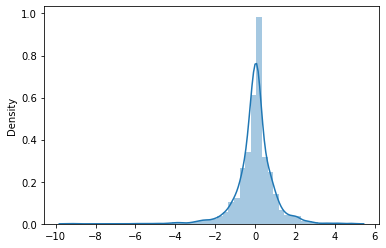

In [ ]:
#specificity
spt = df[df['climate'] == 0]['text']
spv = df_test[df_test['climate'] == 0]['text']
spty = df[df['climate'] == 0]['specificity']
spvy = df_test[df_test['climate'] == 0]['specificity']
spX_train = vectorizer.fit_transform(spt)
spy_train = spty

#Logistic Regression
m.fit(spX_train.toarray(), spy_train)
sns.distplot(m.coef_)

#predict model
spX_test = vectorizer.transform(spv)
#X_test_subset = csr_matrix(X_test[:, :4000])
spy_test = spvy
pred_class = m.predict(spX_test)
print(classification_report(spy_test, pred_class))

#classification report
splr = pd.DataFrame(classification_report(spy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    splr.to_excel(writer, sheet_name="splr")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.64      0.69      0.66       132
         1.0       0.78      0.74      0.76       197

    accuracy                           0.72       329
   macro avg       0.71      0.71      0.71       329
weighted avg       0.72      0.72      0.72       329



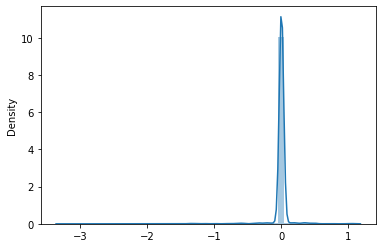

In [ ]:
#Lasso
m1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', class_weight = 'balanced')
m1.fit(spX_train, spy_train)
sns.distplot(m1.coef_)

#predict model
pred_class = m1.predict(spX_test)
print(classification_report(spy_test, pred_class))

#classification report
spla = pd.DataFrame(classification_report(spy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    spla.to_excel(writer, sheet_name="spla")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.70      0.74      0.72       132
         1.0       0.82      0.79      0.80       197

    accuracy                           0.77       329
   macro avg       0.76      0.76      0.76       329
weighted avg       0.77      0.77      0.77       329



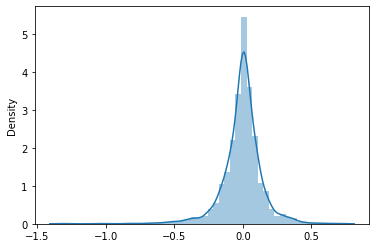

In [ ]:
#Ridge
m2 = LogisticRegression(penalty='l2', C=1.0, class_weight = 'balanced')
m2.fit(spX_train, spy_train)
sns.distplot(m2.coef_)

#predict model
pred_class = m2.predict(spX_test)
print(classification_report(spy_test, pred_class))

#classification report
spri = pd.DataFrame(classification_report(spy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    spri.to_excel(writer, sheet_name="spri")

In [ ]:
#SVM

model = SVC(kernel='rbf', C=1.0, class_weight = 'balanced')
model.fit(spX_train, spy_train)

#predict model
pred_class = model.predict(spX_test)
print(classification_report(spy_test, pred_class))

#classification report
spsvm = pd.DataFrame(classification_report(spy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    spsvm.to_excel(writer, sheet_name="spsvm")

              precision    recall  f1-score   support

         0.0       0.66      0.80      0.72       132
         1.0       0.84      0.72      0.78       197

    accuracy                           0.75       329
   macro avg       0.75      0.76      0.75       329
weighted avg       0.77      0.75      0.75       329



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(329, 2136)
              precision    recall  f1-score   support

         0.0       0.71      0.78      0.74       132
         1.0       0.84      0.79      0.81       197

    accuracy                           0.78       329
   macro avg       0.78      0.78      0.78       329
weighted avg       0.79      0.78      0.79       329



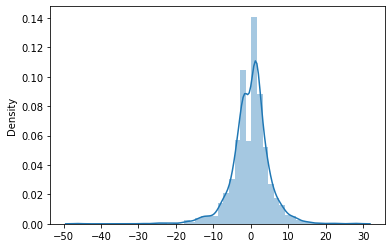

In [ ]:
#TF-IDF
tf = TfidfVectorizer(preprocessor=prep)
sp_tfX_train = tf.fit_transform(spt)
spy_train = spty
m.fit(sp_tfX_train, spy_train)
sns.distplot(m.coef_)

sp_tfX_test = tf.transform(spv)
spy_test = spvy
print(sp_tfX_test.shape)

pred_class = m.predict(sp_tfX_test)
print(classification_report(spy_test, pred_class))


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.71      0.78      0.74       132
         1.0       0.84      0.79      0.81       197

    accuracy                           0.78       329
   macro avg       0.78      0.78      0.78       329
weighted avg       0.79      0.78      0.79       329



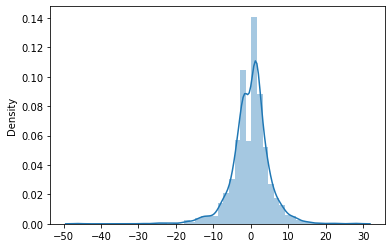

In [ ]:
#logistic regression
m = LogisticRegression(penalty = 'none', class_weight = 'balanced')
m.fit(sp_tfX_train, spy_train)

#predict model
pred_class = m.predict(sp_tfX_test)
sns.distplot(m.coef_)
print(classification_report(spy_test, pred_class))

#classification report
sptflr = pd.DataFrame(classification_report(spy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    sptflr.to_excel(writer, sheet_name="sptflr")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.56      0.80      0.66       132
         1.0       0.81      0.59      0.68       197

    accuracy                           0.67       329
   macro avg       0.69      0.69      0.67       329
weighted avg       0.71      0.67      0.67       329



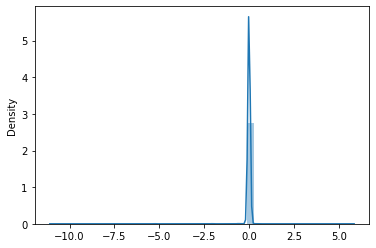

In [ ]:
#Lasso
m1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', class_weight = 'balanced')
m1.fit(sp_tfX_train, spy_train)
sns.distplot(m1.coef_)

#predict model
pred_class = m1.predict(sp_tfX_test)
print(classification_report(spy_test, pred_class))

#classification report
sptfla = pd.DataFrame(classification_report(spy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    sptfla.to_excel(writer, sheet_name="sptfla")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.66      0.80      0.72       132
         1.0       0.84      0.73      0.78       197

    accuracy                           0.76       329
   macro avg       0.75      0.76      0.75       329
weighted avg       0.77      0.76      0.76       329



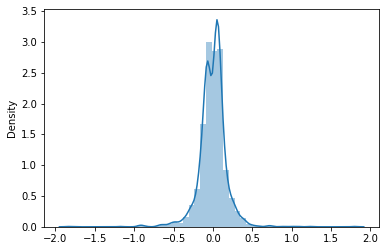

In [ ]:
#Ridge
m2 = LogisticRegression(penalty='l2', C=1.0, class_weight = 'balanced')
m2.fit(sp_tfX_train, spy_train)
sns.distplot(m2.coef_)

#predict model
pred_class = m2.predict(sp_tfX_test)
print(classification_report(spy_test, pred_class))

#classification report
sptfri = pd.DataFrame(classification_report(spy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    sptfri.to_excel(writer, sheet_name="sptfri")

In [ ]:
#SVM

model = SVC(kernel='rbf', C=1.0, class_weight = 'balanced')
model.fit(sp_tfX_train, spy_train)

#predict model
pred_class = model.predict(sp_tfX_test)
print(classification_report(spy_test, pred_class))

#classification report
sptfsvm = pd.DataFrame(classification_report(spy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    sptfsvm.to_excel(writer, sheet_name="sptfsvm")

              precision    recall  f1-score   support

         0.0       0.71      0.78      0.74       132
         1.0       0.84      0.78      0.81       197

    accuracy                           0.78       329
   macro avg       0.77      0.78      0.78       329
weighted avg       0.79      0.78      0.78       329



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.72      0.85      0.78       139
         1.0       0.87      0.76      0.81       190

    accuracy                           0.80       329
   macro avg       0.80      0.80      0.80       329
weighted avg       0.81      0.80      0.80       329



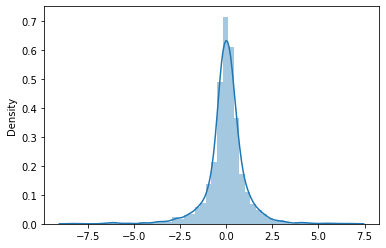

In [ ]:
#commitment
ct = df[df['climate'] == 0]['text']
cv = df_test[df_test['climate'] == 0]['text']
cty = df[df['climate'] == 0]['commitment']
cvy = df_test[df_test['climate'] == 0]['commitment']
cX_train = vectorizer.fit_transform(ct)
cy_train =cty

#Logistic Regression
m.fit(cX_train.toarray(), cy_train)
sns.distplot(m.coef_)

#predict model
cX_test = vectorizer.transform(cv)
#X_test_subset = csr_matrix(X_test[:, :4000])
cy_test = cvy
pred_class = m.predict(cX_test)
print(classification_report(cy_test, pred_class))

#classification report
cmlr = pd.DataFrame(classification_report(cy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    cmlr.to_excel(writer, sheet_name="cmlr")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.72      0.81      0.77       139
         1.0       0.85      0.77      0.81       190

    accuracy                           0.79       329
   macro avg       0.79      0.79      0.79       329
weighted avg       0.80      0.79      0.79       329



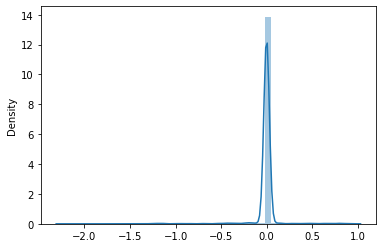

In [ ]:
#Lasso
m1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', class_weight = 'balanced')
m1.fit(cX_train, cy_train)
sns.distplot(m1.coef_)

#predict model
pred_class = m1.predict(cX_test)
print(classification_report(cy_test, pred_class))

#classification report
cmla = pd.DataFrame(classification_report(cy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    cmla.to_excel(writer, sheet_name="cmla")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.73      0.86      0.79       139
         1.0       0.88      0.77      0.82       190

    accuracy                           0.81       329
   macro avg       0.81      0.82      0.81       329
weighted avg       0.82      0.81      0.81       329



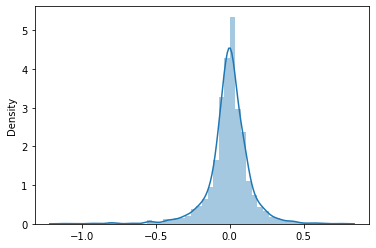

In [ ]:
#Ridge
m2 = LogisticRegression(penalty='l2', C=1.0, class_weight = 'balanced')
m2.fit(cX_train, cy_train)
sns.distplot(m2.coef_)

#predict model
pred_class = m2.predict(cX_test)
print(classification_report(cy_test, pred_class))

#classification report
cmri = pd.DataFrame(classification_report(cy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    cmri.to_excel(writer, sheet_name="cmri")

In [ ]:
#SVM

model = SVC(kernel='rbf', C=1.0, class_weight = 'balanced')
model.fit(cX_train, cy_train)

#predict model
pred_class = model.predict(cX_test)
print(classification_report(cy_test, pred_class))

#classification report
cmsvm = pd.DataFrame(classification_report(cy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    cmsvm.to_excel(writer, sheet_name="cmsvm")

              precision    recall  f1-score   support

         0.0       0.70      0.91      0.79       139
         1.0       0.91      0.72      0.81       190

    accuracy                           0.80       329
   macro avg       0.81      0.81      0.80       329
weighted avg       0.82      0.80      0.80       329



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(329, 2136)
              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80       139
         1.0       0.87      0.81      0.84       190

    accuracy                           0.82       329
   macro avg       0.82      0.82      0.82       329
weighted avg       0.83      0.82      0.82       329



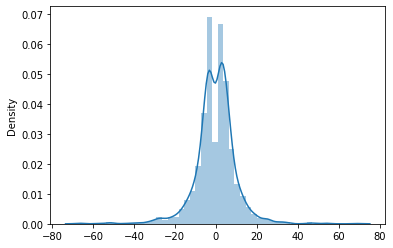

In [ ]:
#TF-IDF
tf = TfidfVectorizer(preprocessor=prep)
c_tfX_train = tf.fit_transform(ct)
cy_train = cty
m.fit(c_tfX_train, cy_train)
sns.distplot(m.coef_)

c_tfX_test = tf.transform(cv)
cy_test = cvy
print(c_tfX_test.shape)

pred_class = m.predict(c_tfX_test)
print(classification_report(cy_test, pred_class))


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80       139
         1.0       0.87      0.81      0.84       190

    accuracy                           0.82       329
   macro avg       0.82      0.82      0.82       329
weighted avg       0.83      0.82      0.82       329



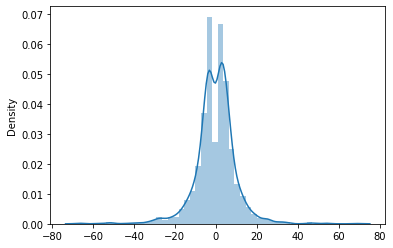

In [ ]:
#logistic regression
m = LogisticRegression(penalty = 'none', class_weight = 'balanced')
m.fit(c_tfX_train, cy_train)

#predict model
pred_class = m.predict(c_tfX_test)
sns.distplot(m.coef_)
print(classification_report(cy_test, pred_class))

#classification report
cmtflr = pd.DataFrame(classification_report(cy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    cmtflr.to_excel(writer, sheet_name="cmtflr")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.64      0.86      0.73       139
         1.0       0.86      0.65      0.74       190

    accuracy                           0.74       329
   macro avg       0.75      0.75      0.74       329
weighted avg       0.77      0.74      0.74       329



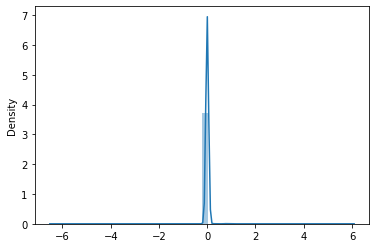

In [ ]:
#Lasso
m1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', class_weight = 'balanced')
m1.fit(c_tfX_train, cy_train)
sns.distplot(m1.coef_)

#predict model
pred_class = m1.predict(c_tfX_test)
print(classification_report(cy_test, pred_class))

#classification report
cmtfla = pd.DataFrame(classification_report(cy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    cmtfla.to_excel(writer, sheet_name="cmtfla")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

         0.0       0.70      0.91      0.79       139
         1.0       0.91      0.72      0.80       190

    accuracy                           0.80       329
   macro avg       0.81      0.81      0.80       329
weighted avg       0.82      0.80      0.80       329



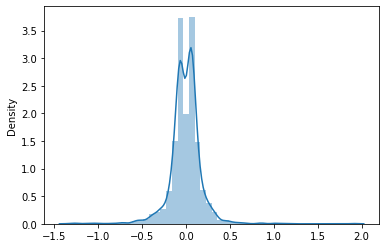

In [ ]:
#Ridge
m2 = LogisticRegression(penalty='l2', C=1.0, class_weight = 'balanced')
m2.fit(c_tfX_train, cy_train)
sns.distplot(m2.coef_)

#predict model
pred_class = m2.predict(c_tfX_test)
print(classification_report(cy_test, pred_class))

#classification report
cmtfri = pd.DataFrame(classification_report(cy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    cmtfri.to_excel(writer, sheet_name="cmtfri")

In [ ]:
#SVM

model = SVC(kernel='rbf', C=1.0, class_weight = 'balanced')
model.fit(c_tfX_train, cy_train)

#predict model
pred_class = model.predict(c_tfX_test)
print(classification_report(cy_test, pred_class))

#classification report
cmtfsvm = pd.DataFrame(classification_report(cy_test, pred_class, output_dict=True)).transpose()
with pd.ExcelWriter("bow_weighted.xlsx", mode="a", engine="openpyxl", if_sheet_exists='replace') as writer:
    cmtfsvm.to_excel(writer, sheet_name="cmtfsvm")

              precision    recall  f1-score   support

         0.0       0.71      0.91      0.79       139
         1.0       0.91      0.73      0.81       190

    accuracy                           0.80       329
   macro avg       0.81      0.82      0.80       329
weighted avg       0.83      0.80      0.80       329

